## Telecom Customer Churn
Made By Abduallah Abuhassan (kaiozwald)

## Importing Libraries

In [194]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import pickle

In [92]:
data = pd.read_csv('Data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
data.drop(columns=['customerID'], inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [95]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA

In [96]:
# Qs1. Customer Behavior Analysis

# What is the Churn Rate?
# What is the average customer tenure?
# Are long-term contract customers more stable than short-term ones?
# What is the difference in monthly charges between churned and retained customers?

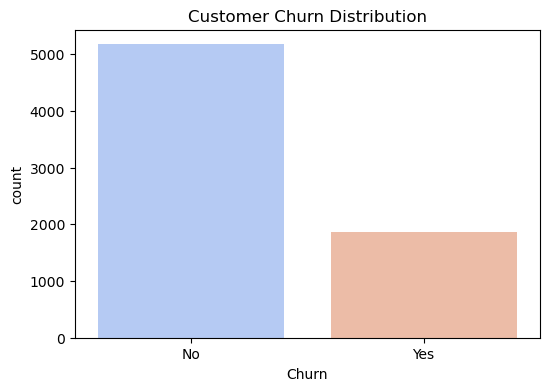

In [97]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()

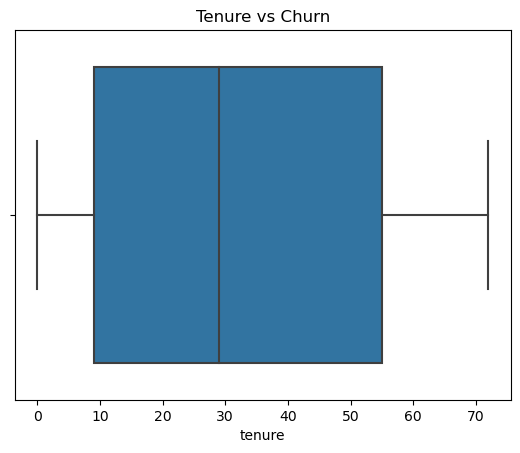

In [98]:
sns.boxplot(x=data['tenure'])
plt.title("Tenure vs Churn")
plt.show()

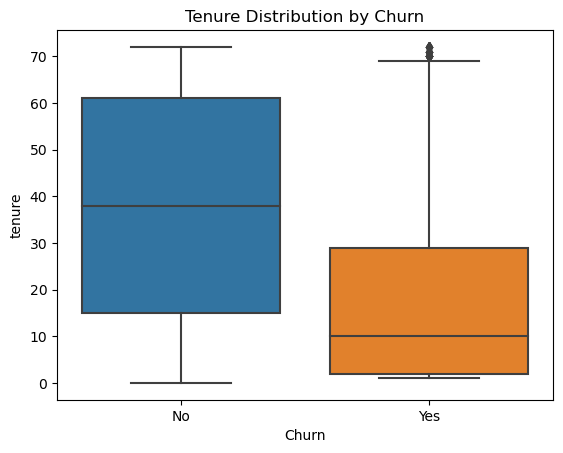

In [99]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Tenure Distribution by Churn")
plt.show()

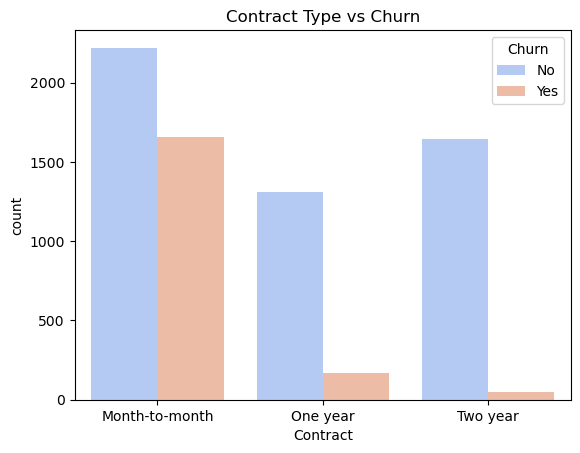

In [100]:
sns.countplot(x='Contract', hue='Churn', data=data, palette='coolwarm')
plt.title("Contract Type vs Churn")
plt.show()

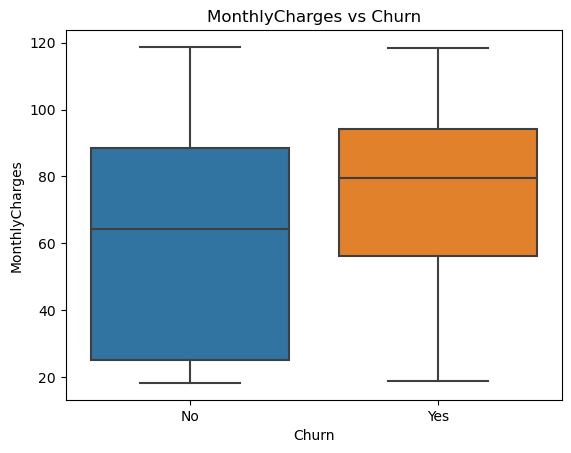

In [101]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("MonthlyCharges vs Churn")
plt.show()

In [102]:
# 2. Services and Churn Relationship
# Are there specific services associated with higher churn rates?
# Do customers with "Online Security" or "Tech Support" churn less?
# Which services are most common among churned customers?

In [103]:
# encoding services cols

data = pd.get_dummies(data, columns=['InternetService'], drop_first=False,dtype=int)
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','InternetService_DSL','InternetService_Fiber optic','InternetService_No']

data[service_cols] = data[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0,})

C:\Users\kai ozwald\AppData\Local\Temp\ipykernel_21384\3954489847.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[service_cols] = data[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0,})


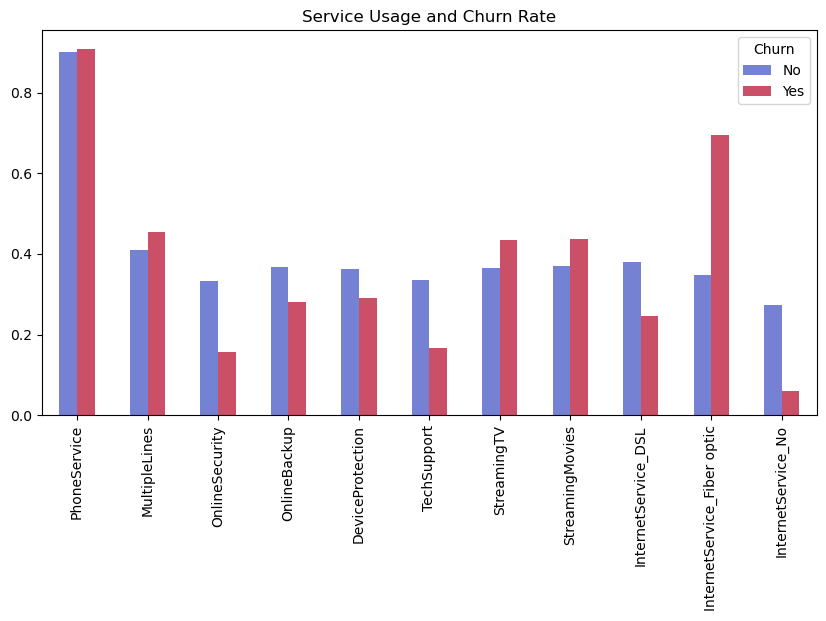

In [104]:
# vis
churn_rates = data.groupby("Churn")[service_cols].mean().T
churn_rates.plot(kind="bar", figsize=(10,5), colormap="coolwarm", alpha=0.7)
plt.title("Service Usage and Churn Rate")
plt.show()

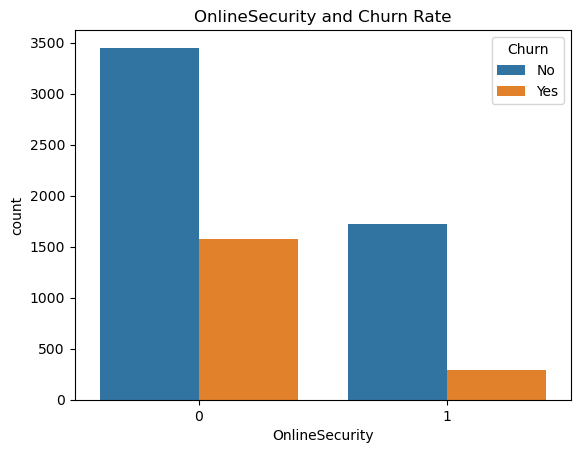

In [105]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title("OnlineSecurity and Churn Rate")
plt.show()

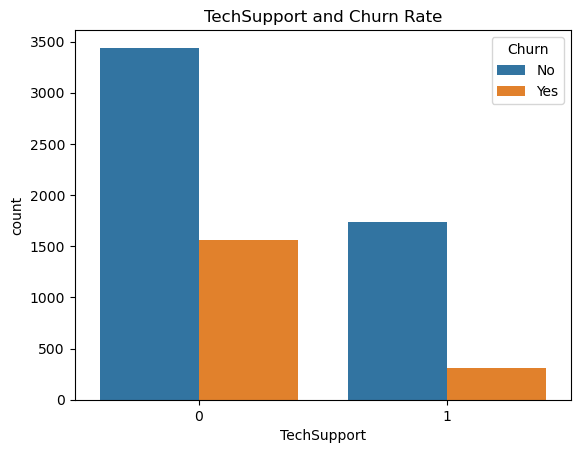

In [106]:
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.title("TechSupport and Churn Rate")
plt.show()

In [107]:
# 3. Payment & Contract Influence on Churn
# Is there a relationship between payment methods and churn?
# Do customers with monthly contracts churn more?
# Are customers who use electronic billing more loyal?

<Axes: xlabel='PaymentMethod'>

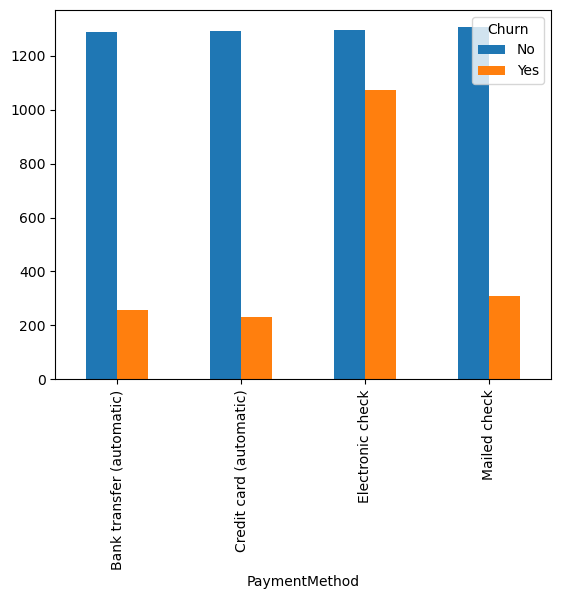

In [108]:
pd.crosstab(data['PaymentMethod'], data['Churn']).plot(kind='bar', stacked=False,)

<Axes: ylabel='count'>

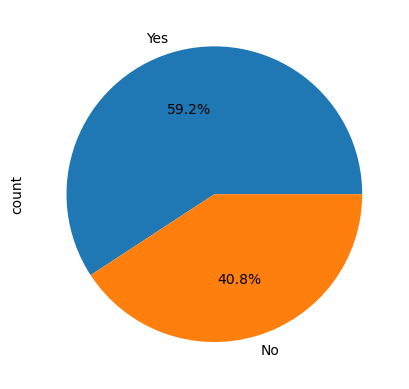

In [109]:
data['PaperlessBilling'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [110]:
# 4. Demographic Insights
# Do male customers churn more than female customers?
# Are customers with dependents (children) more likely to stay?

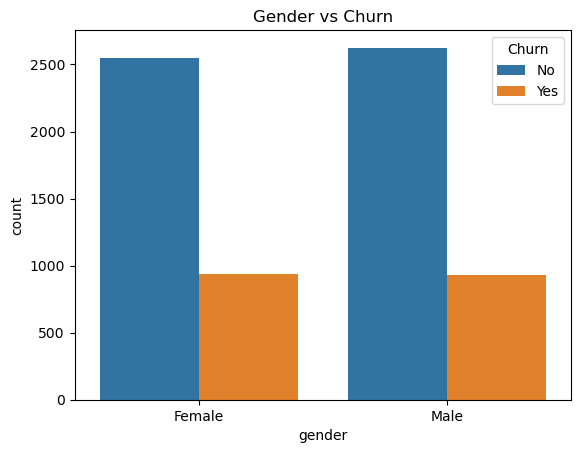

In [111]:
sns.countplot(x='gender', hue='Churn', data=data)
plt.title("Gender vs Churn")
plt.show()

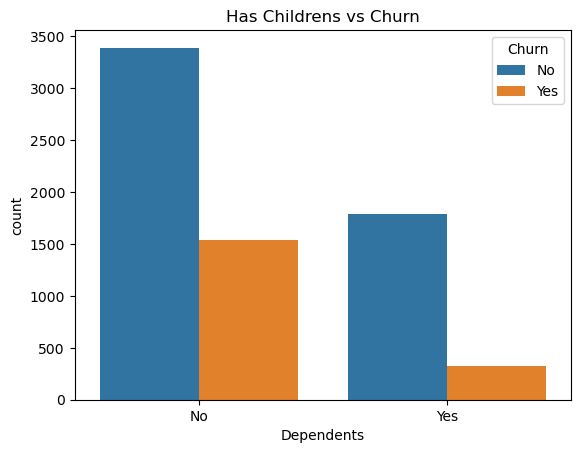

In [112]:
sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title("Has Childrens vs Churn")
plt.show()

In [113]:
# 5. Can We Predict Churn?
# What are the most influential factors driving churn?

In [114]:
# encoding for heatmap

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

# Binary encoding for Yes/No columns
binary_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']
data[binary_cols] = data[binary_cols].replace({'Yes': 1, 'No': 0})

# One-hot encoding for multi-class categorical columns
data = pd.get_dummies(data, columns=['gender', 'Contract', 'PaymentMethod'], drop_first=False, dtype=int)

C:\Users\kai ozwald\AppData\Local\Temp\ipykernel_21384\502268963.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_cols] = data[binary_cols].replace({'Yes': 1, 'No': 0})


<Axes: >

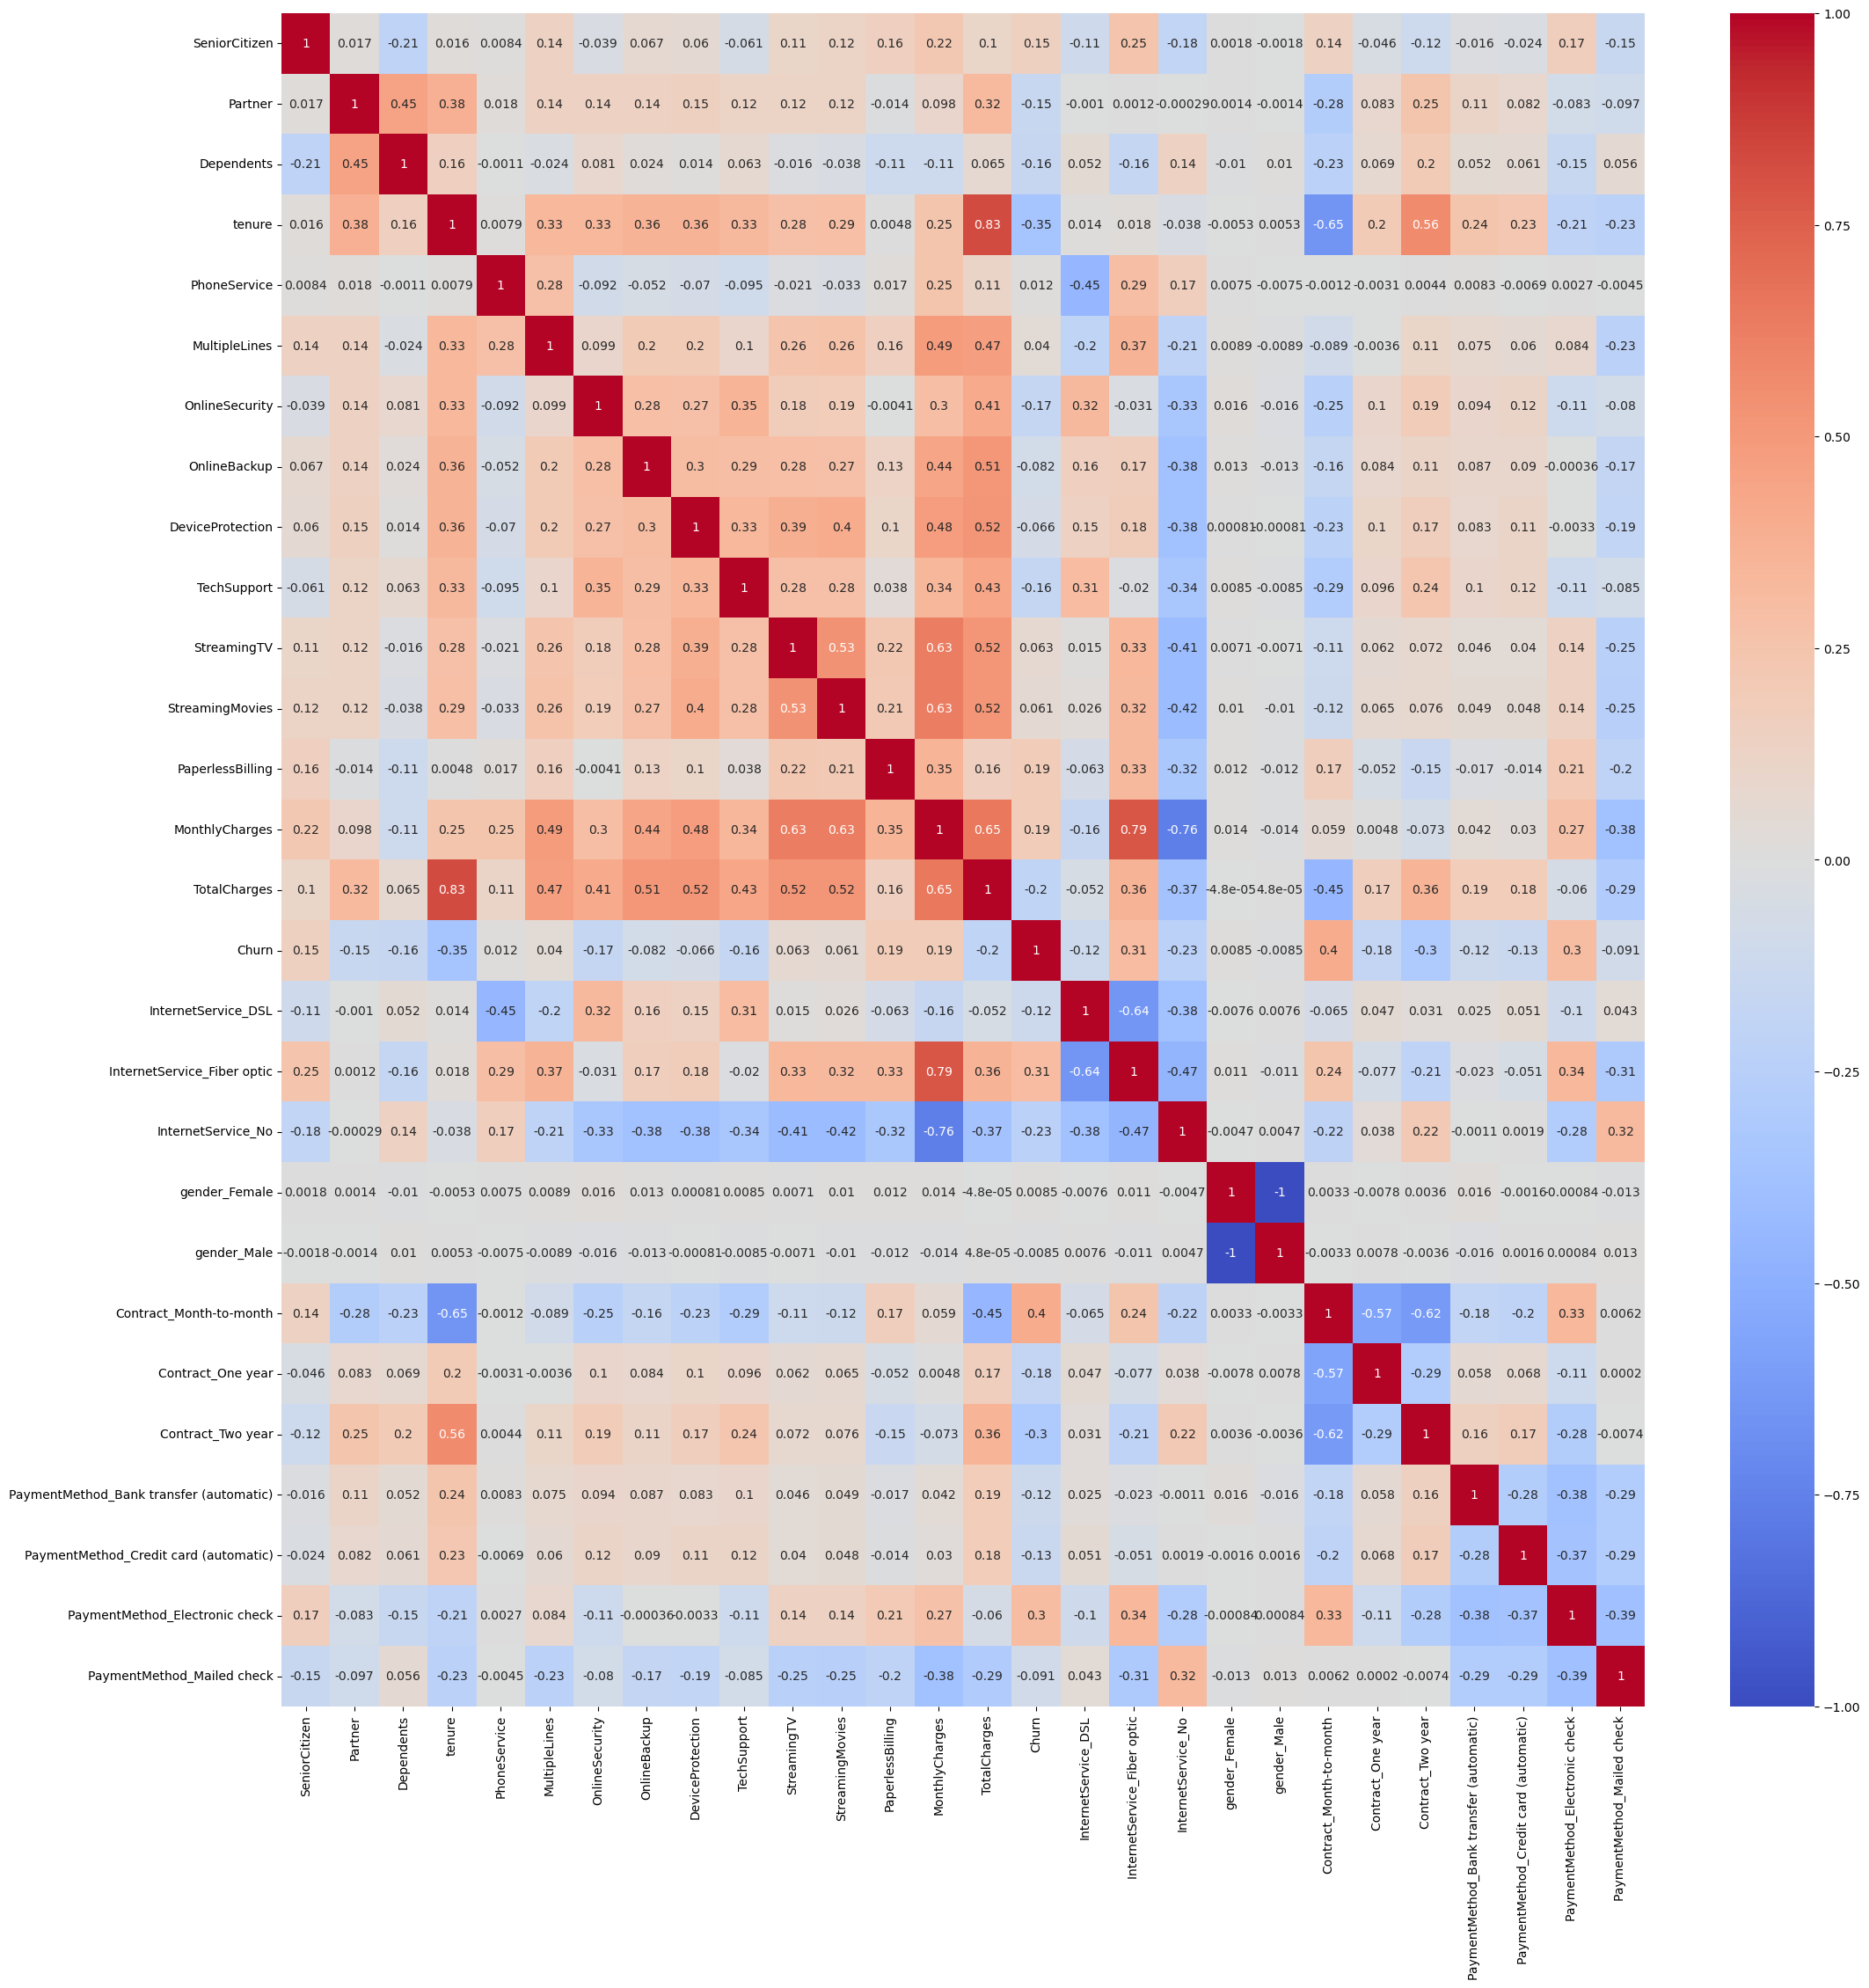

In [115]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)

In [116]:
# Save Final Cleaned Data
data.to_csv('cleaned_data.csv')

## Modeling

In [184]:
df = pd.read_csv('cleaned_data.csv',index_col=0)
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_No,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [139]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [140]:
y.value_counts()
# there is unbalanced in the data

Churn
0    5163
1    1869
Name: count, dtype: int64

In [156]:
# Balance Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, shuffle =True)

In [157]:
# GradientBoosting Model
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42) 
GBCModel.fit(X_train, y_train)

#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

In [158]:
# ClassificationReport
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.85      0.83      0.84      1037
           1       0.83      0.86      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [159]:
# ROCAUCScore
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.8427431862674812


## FineTuning

In [166]:
# GridSearchCV
SelectedModel = GradientBoostingClassifier()
SelectedParameters = {'n_estimators':[100],'max_depth':[3],'random_state':[42]}
GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.8516949152542372
Best Parameters are : {'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Best Estimator is : GradientBoostingClassifier(random_state=42)


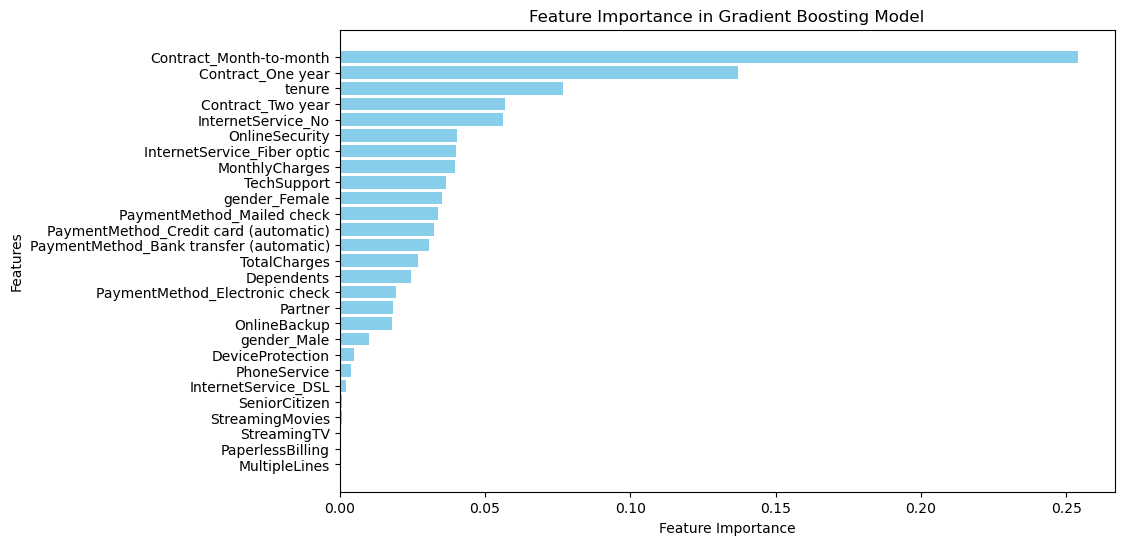

,Feature,Importance
20,Contract_Month-to-month,0.253895
21,Contract_One year,0.136912
3,tenure,0.076964
22,Contract_Two year,0.056795
17,InternetService_No,0.056298
6,OnlineSecurity,0.040492
16,InternetService_Fiber optic,0.039986
13,MonthlyCharges,0.039778
9,TechSupport,0.036665
18,gender_Female,0.035102


In [173]:
# select important features only
feature_importance = GBCModel.feature_importances_

features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Model')
plt.gca().invert_yaxis() 
plt.show()
features_df

In [185]:
df = df.drop(['MultipleLines','PaperlessBilling','StreamingTV','StreamingMovies','SeniorCitizen'],axis=1)

In [186]:
# resplit data
X = df.drop('Churn',axis=1)
y = df['Churn']

In [187]:
# rebalancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# respliting
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, shuffle =True)

In [188]:
# Gradient boost again
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42) 
GBCModel.fit(X_train, y_train)

#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

In [189]:
# check acc
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.8398239858004092


In [190]:
# gridsearchcv
SelectedModel = GradientBoostingClassifier()
SelectedParameters = {'n_estimators':[100],'max_depth':[3],'random_state':[42]}
GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.8509685230024213
Best Parameters are : {'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Best Estimator is : GradientBoostingClassifier(random_state=42)


#### we can see now that model has same acc after finetuning, selecting important features
#### so we are done here with 0.85 acc

In [196]:
# Save Model for later
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(GridSearchModel, file)

In [198]:
# load model for testing
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Sources:
Data:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn